In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
data_url = "https://github.com/robert-koch-institut/COVID-19-Hospitalisierungen_in_Deutschland/blob/master/Aktuell_Deutschland_COVID-19-Hospitalisierungen.csv?raw=true"
data = pd.read_csv(data_url)
data = data.set_index(pd.to_datetime(data["Datum"]))

In [24]:
# filter for the data we care about
data = data[data["Altersgruppe"] == "00+"]

In [26]:
# HospitalisierungsInzidenz
hi = data[["Bundesland", "7T_Hospitalisierung_Inzidenz"]]

In [31]:
hi_bund = hi[hi["Bundesland"] == "Bundesgebiet"]

In [34]:
def fine_tune_plot(ax):
    pass

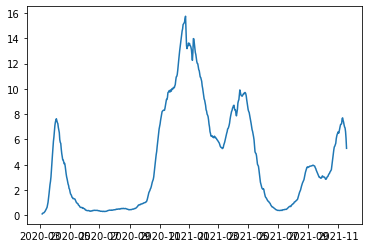

In [37]:
fig, ax = plt.subplots()
ax.plot(hi_bund.index, hi_bund["7T_Hospitalisierung_Inzidenz"].values)
# fine_tune_plot(ax)

<AxesSubplot:xlabel='Datum'>

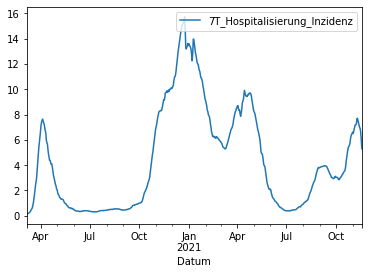

In [33]:
hi_bund.plot()